In [1]:
from emd_analysis_functions import *

In [2]:
# Load the HPC data from the trials during the OS task. In the 'HPC' column you will find the amplitude on each nth sample
t1 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t1/HPC_100_CH4_0.continuous.mat')['HPC']
t2 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t2/HPC_100_CH4_0.continuous.mat')['HPC']
t3 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t3/HPC_100_CH4_0.continuous.mat')['HPC']
t4 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t4/HPC_100_CH4_0.continuous.mat')['HPC']
t5 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t5/HPC_100_CH4_0.continuous.mat')['HPC']
t6 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t6/HPC_100_CH4_0.continuous.mat')['HPC']

srate = 1000
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24*10, 'linear')

# Generated signals
data_length=30 #time in seconds",
npnts = srate*data_length #number of points to generate,
t  = np.arange(0,npnts)/srate #time vector
nonmodulatedamplitude=2; # increase this to get less modulation (lower MI value),
Phase_Modulating_Freq=8
Amp_Modulated_Freq=80
A_fa=(0.2*(np.sin(2*np.pi*t*Phase_Modulating_Freq)+1)+nonmodulatedamplitude*0.1)
A_fpmax= 1#Maximal amplitude of fp   
lfp=A_fa*np.sin(2*np.pi*t*Amp_Modulated_Freq)+(A_fpmax*np.sin(2*np.pi*t*Phase_Modulating_Freq))
# Feel free to set a seed here
generated_lfps = []

for _ in range(5):
    gauss=np.random.randn(1,len(lfp))#gaussian noise
    lfp= np.add(lfp,gauss[0])
    generated_lfps.append(lfp)

In [3]:
#Method #1: iterated mask default settings
itmaskconfig = emd.sift.get_config('iterated_mask_sift')
itmaskconfig['max_imfs'] = 8
itmaskconfig['sample_rate'] = srate
itmaskconfig['ret_mask_freq'] = True
itmask = partial(emd.sift.iterated_mask_sift, **itmaskconfig)
itmaskconfig['max_imfs'] = 7
itmask_gen = partial(emd.sift.iterated_mask_sift, **itmaskconfig)

# Method #2: mask sift with mask frequency based on amplitude-weighted mean IF of first IMF from regular sifting. 
ifmaskconfig = emd.sift.get_config('mask_sift')
ifmaskconfig['mask_freqs'] = 'if'
ifmaskconfig['max_imfs'] = 8
# To compare the masks used
ifmaskconfig['ret_mask_freq'] = True
# the function ifmask will run a masked sift on a signal x, with the mask frequency based on IF of first IMF.
# should return the IMFs and the mask frequencies used
ifmask = partial(emd.sift.mask_sift, **ifmaskconfig)
ifmaskconfig['max_imfs'] = 7
ifmask_gen = partial(emd.sift.mask_sift, **ifmaskconfig)

# Method #3: mask sift with mask frequency based on the amount of zero crossings of first IMF through 'regular' sifting. 
zcmaskconfig = emd.sift.get_config('mask_sift')
zcmaskconfig['max_imfs'] = 8
zcmaskconfig['ret_mask_freq'] = True
# the function zcmask will run a masked sift on a signal x, with the mask frequency based on the amount of zero crossings of first IMF.
# should return the IMFs and the mask frequencies used
zcmask = partial(emd.sift.mask_sift, **zcmaskconfig)
zcmaskconfig['max_imfs'] = 7
zcmask_gen = partial(emd.sift.mask_sift, **zcmaskconfig)

#Method #4: iterated mask IF
itmaskifconfig = emd.sift.get_config('iterated_mask_sift')
itmaskifconfig['max_imfs'] = 8
itmaskifconfig['sample_rate'] = srate
itmaskifconfig['ret_mask_freq'] = True
itmaskifconfig['mask_0'] = 'if'
itmaskif = partial(emd.sift.iterated_mask_sift, **itmaskifconfig)
itmaskifconfig['max_imfs'] = 7
itmaskif_gen = partial(emd.sift.iterated_mask_sift, **itmaskifconfig)

# Method #5: Ensemble sift with 24 ensembles
# imf4 = emd.sift.ensemble_sift(lfp, max_imfs=10, nensembles=24, nprocesses=6, ensemble_noise=1)
ensembleconfig = emd.sift.get_config('ensemble_sift')
ensembleconfig['nensembles'] = 24
ensembleconfig['max_imfs'] = 8
ensembleconfig['nprocesses'] = 6
ensembleconfig['ensemble_noise'] = 1
ensemble = partial(emd.sift.ensemble_sift, **ensembleconfig)
ensembleconfig['max_imfs'] = 7
ensemble_gen = partial(emd.sift.ensemble_sift, **ensembleconfig)


method_names = ['Iterated mask sift ZC', 'Masked sift IF', 'Masked sift ZC', 'Iterated mask sift IF', 'Ensemble sift']


In [4]:
#Plot for ten seconds of a trial
# fig199,axs199 = plt.subplots(1,1, figsize=(20,10))
# plt.plot(np.linspace(0,10*srate-1, 10*srate)/srate, t1[:10*srate])
# axs199.set_xlabel('Time (s)',size=25)
# axs199.set_ylabel('\u03BCv', size=25)
# axs199.set_title('Trial 1', size=30)
# axs199.xaxis.set_tick_params(labelsize=20)
# axs199.yaxis.set_tick_params(labelsize=20)

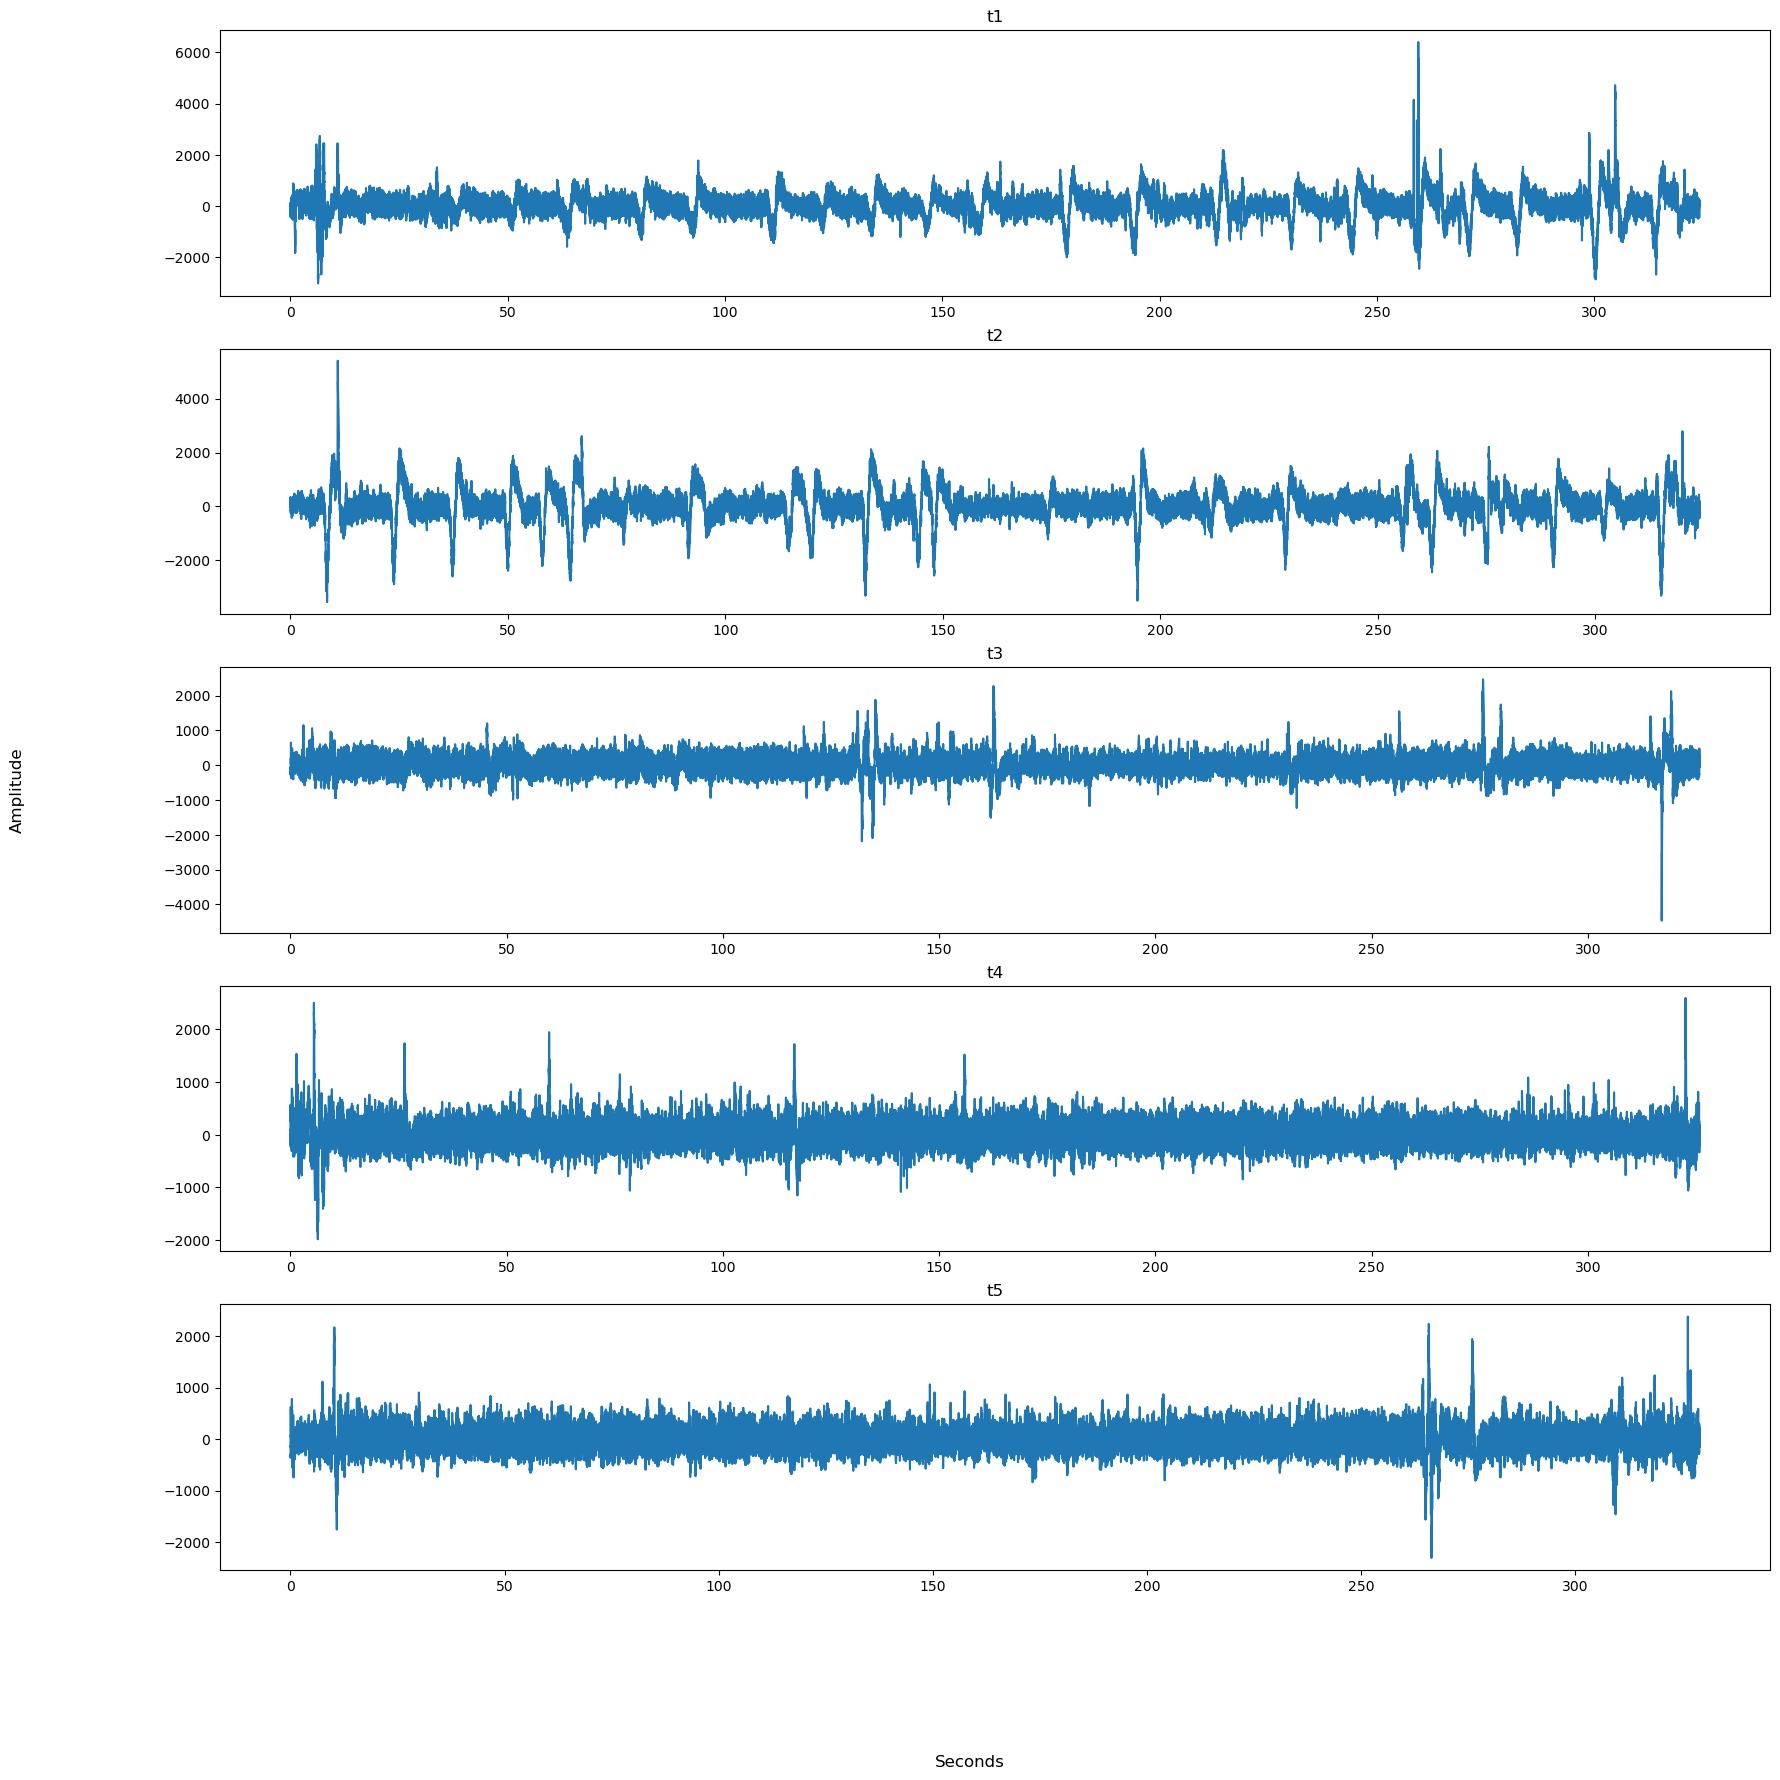

In [5]:
# Plots of the trials
fig1,axs1 = plt.subplots(5,1, figsize=(20,20))
axs1[0].plot(np.arange(0,len(t1))/srate, t1)
axs1[1].plot(np.arange(0,len(t2))/srate, t2)
axs1[2].plot(np.arange(0,len(t3))/srate, t3)
axs1[3].plot(np.arange(0,len(t4))/srate, t4)
axs1[4].plot(np.arange(0,len(t5))/srate, t5)
fig1.supxlabel('Seconds')
fig1.supylabel('Amplitude')
axs1[0].set_title('t1')
axs1[1].set_title('t2')
axs1[2].set_title('t3')
axs1[3].set_title('t4')
axs1[4].set_title('t5')
plt.show()

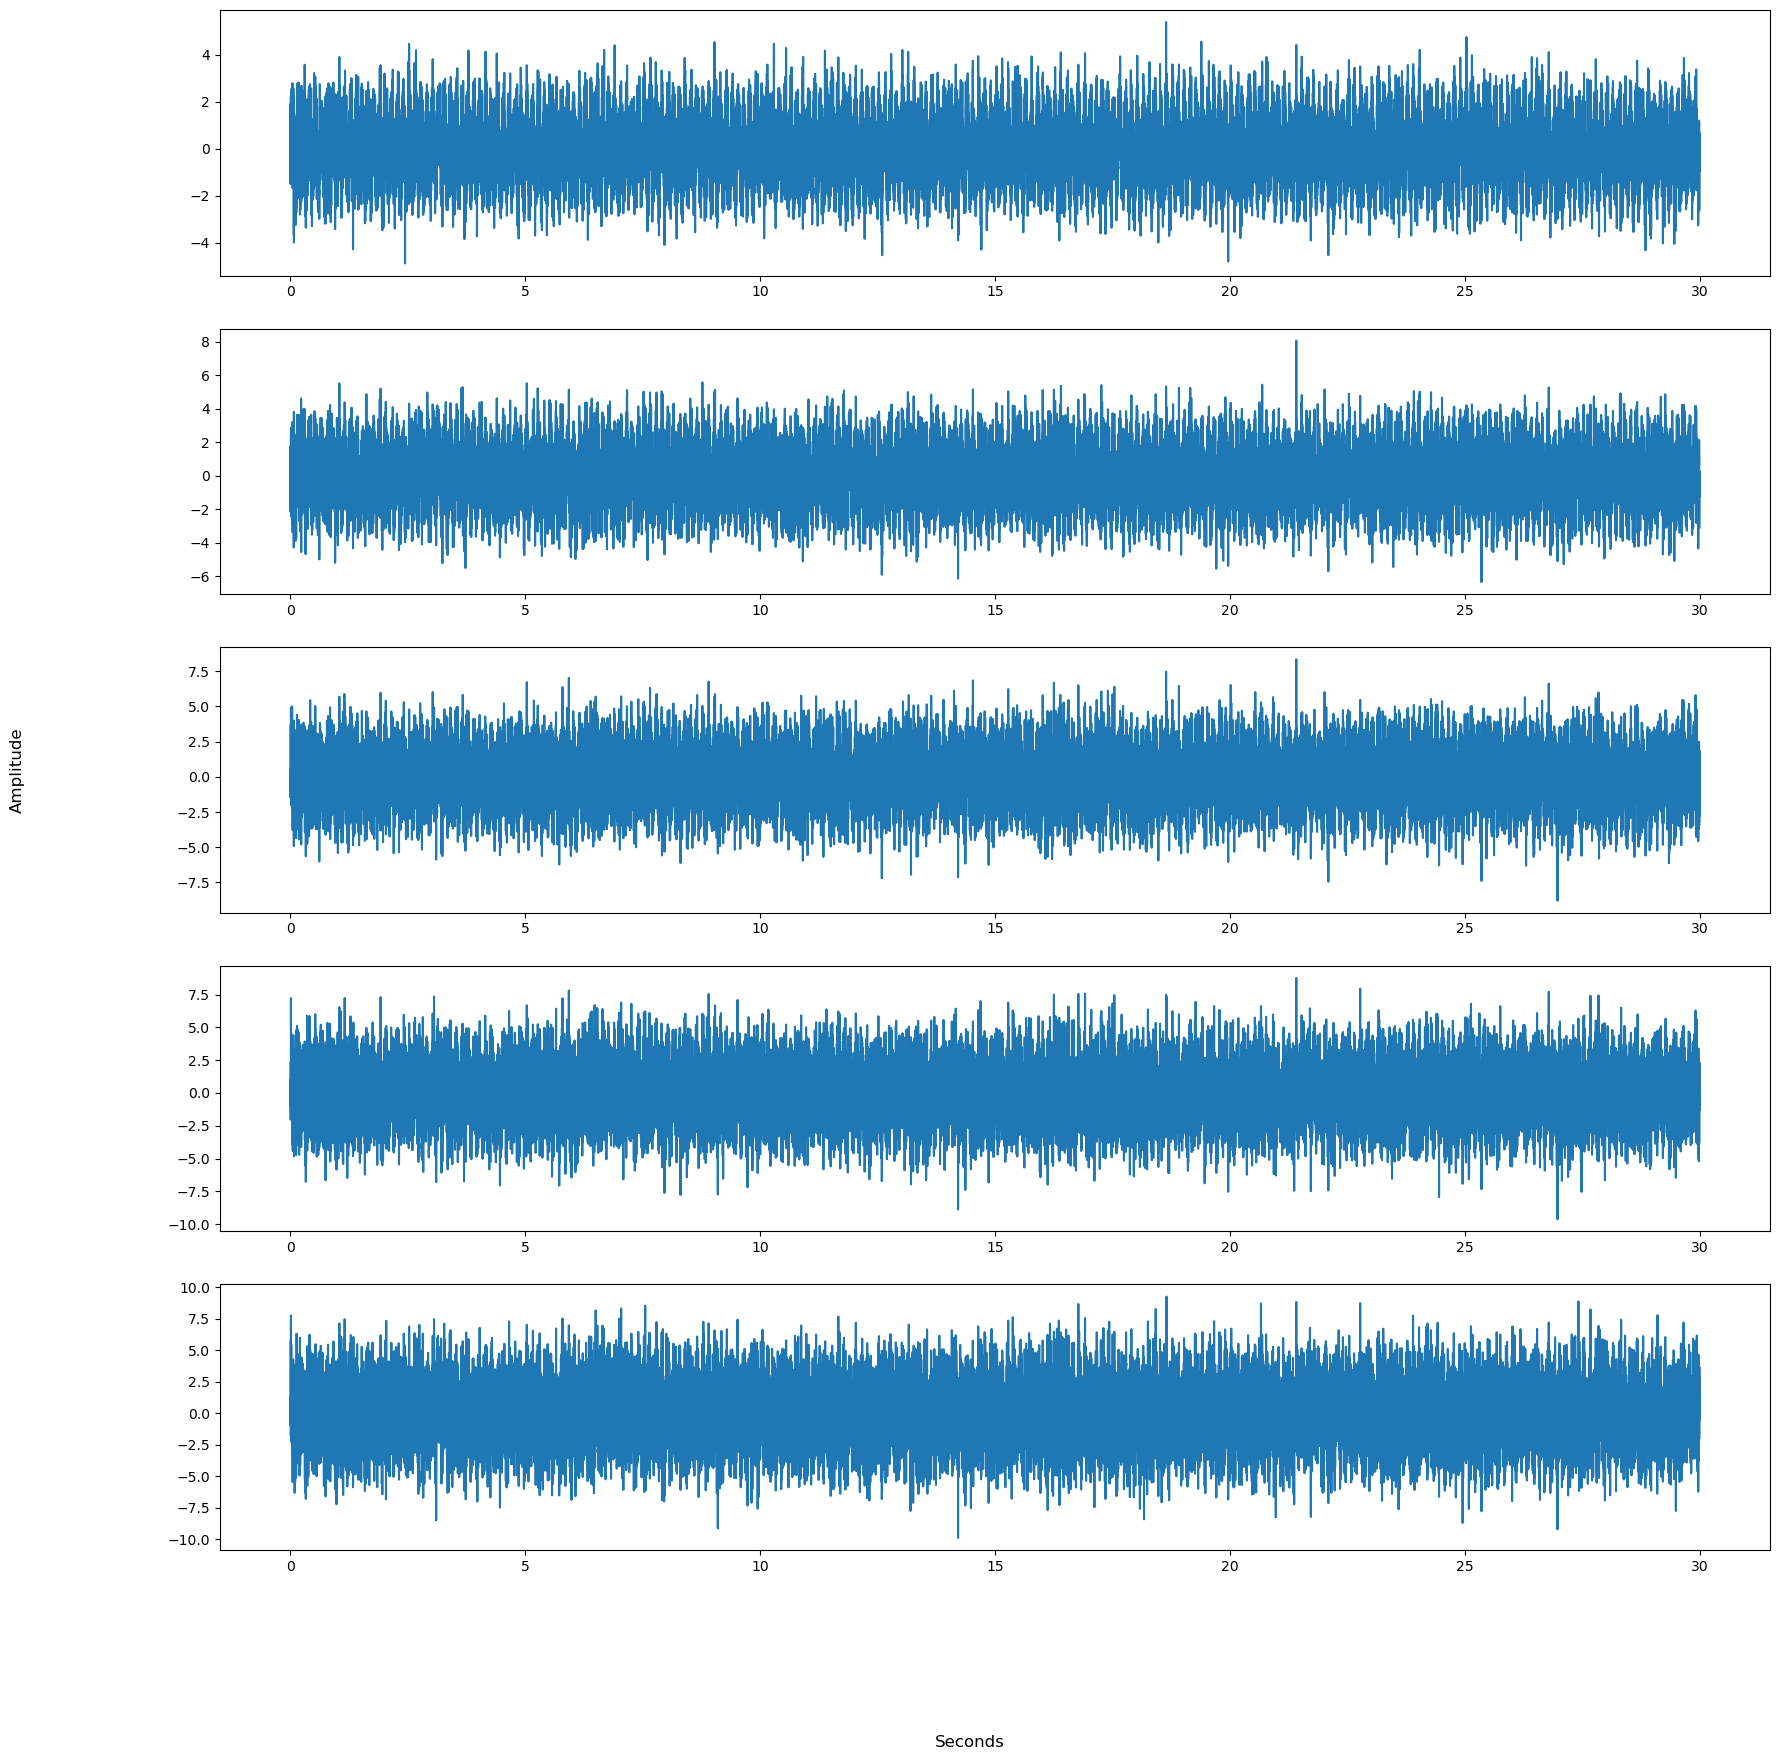

In [6]:
# Plots of the generated signals
fig11, axs11 = plt.subplots(5,1, figsize=(20,20))
for i, lfp in enumerate(generated_lfps):
    axs11[i].plot(np.arange(0, len(lfp))/srate, lfp)
fig11.supxlabel('Seconds')
fig11.supylabel('Amplitude')
plt.show()

In [7]:
# imfs_methods, masks_methods = run_mask_methods(t1, srate, [itmask, ifmask, zcmask, itmaskif])
# imfs_methods.append(ensemble(t1))

In [8]:
trials_list = [t1, t2, t3, t4, t5]
maskmethods_list = [itmask, ifmask, zcmask, itmaskif]
ensemblemethods_list = [ensemble]

In [9]:
maskmethods_gen = [itmask_gen, ifmask_gen, zcmask_gen, itmaskif_gen]
ensemblemethods_gen = [ensemble_gen]

In [12]:
selected_imfs_gen, imfs_ae_gen, selected_freqs_gen, hhts_trials_gen, pmsis_trials_gen = trials_analysis(generated_lfps, maskmethods_gen, ensemblemethods_gen, method_names, srate, freq_edges)

In [11]:
pmsis_trials_test = trials_analysis(generated_lfps, maskmethods_gen, ensemblemethods_gen, method_names, srate, freq_edges, pmsi_only=True)

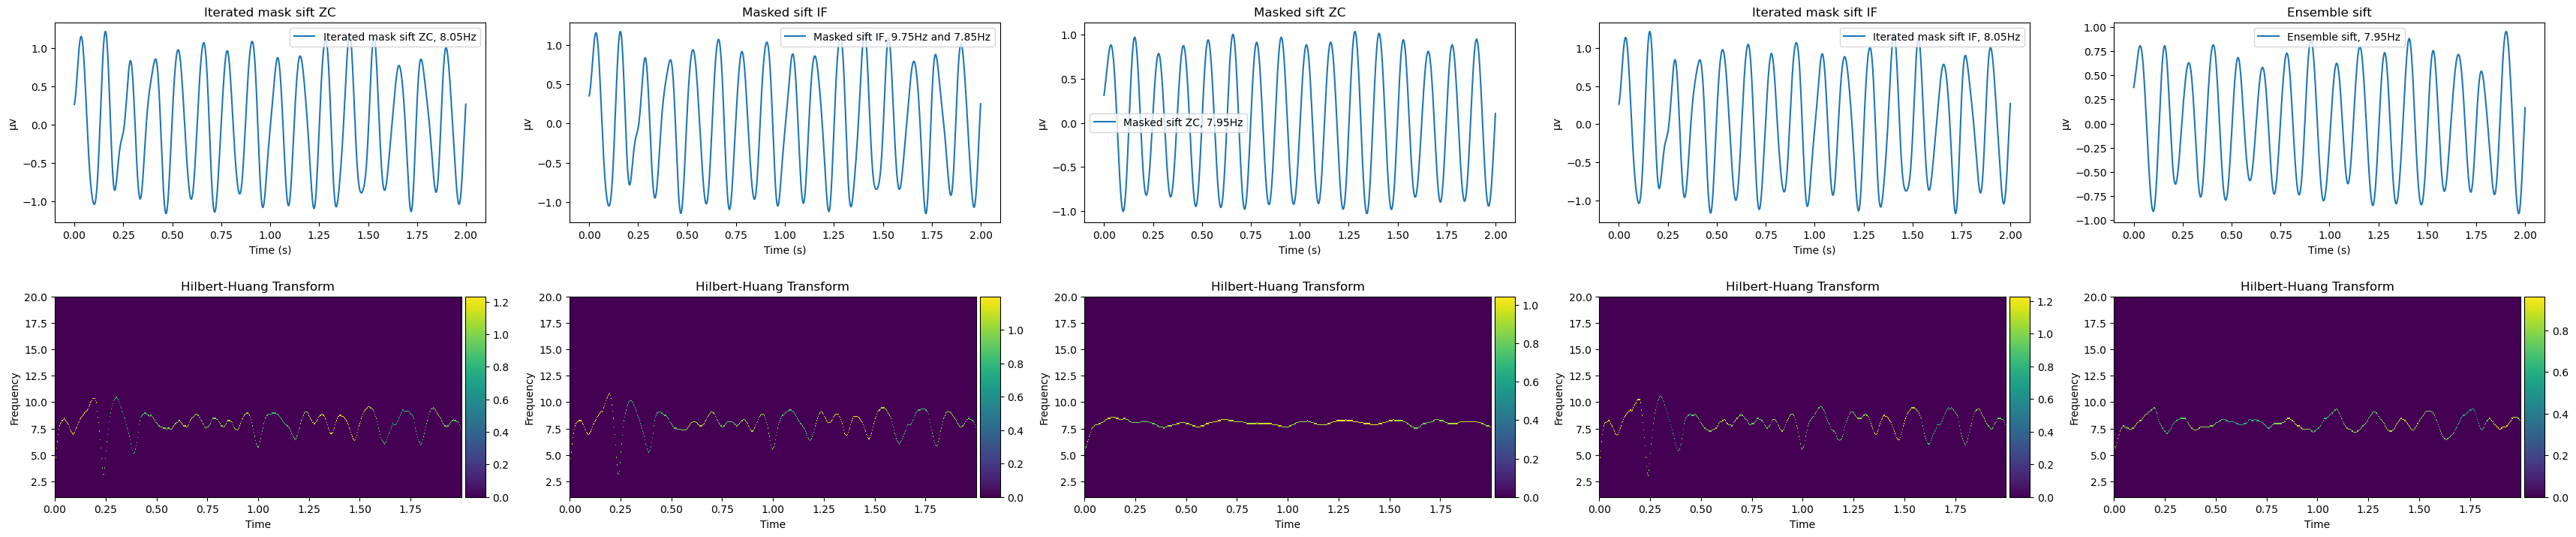

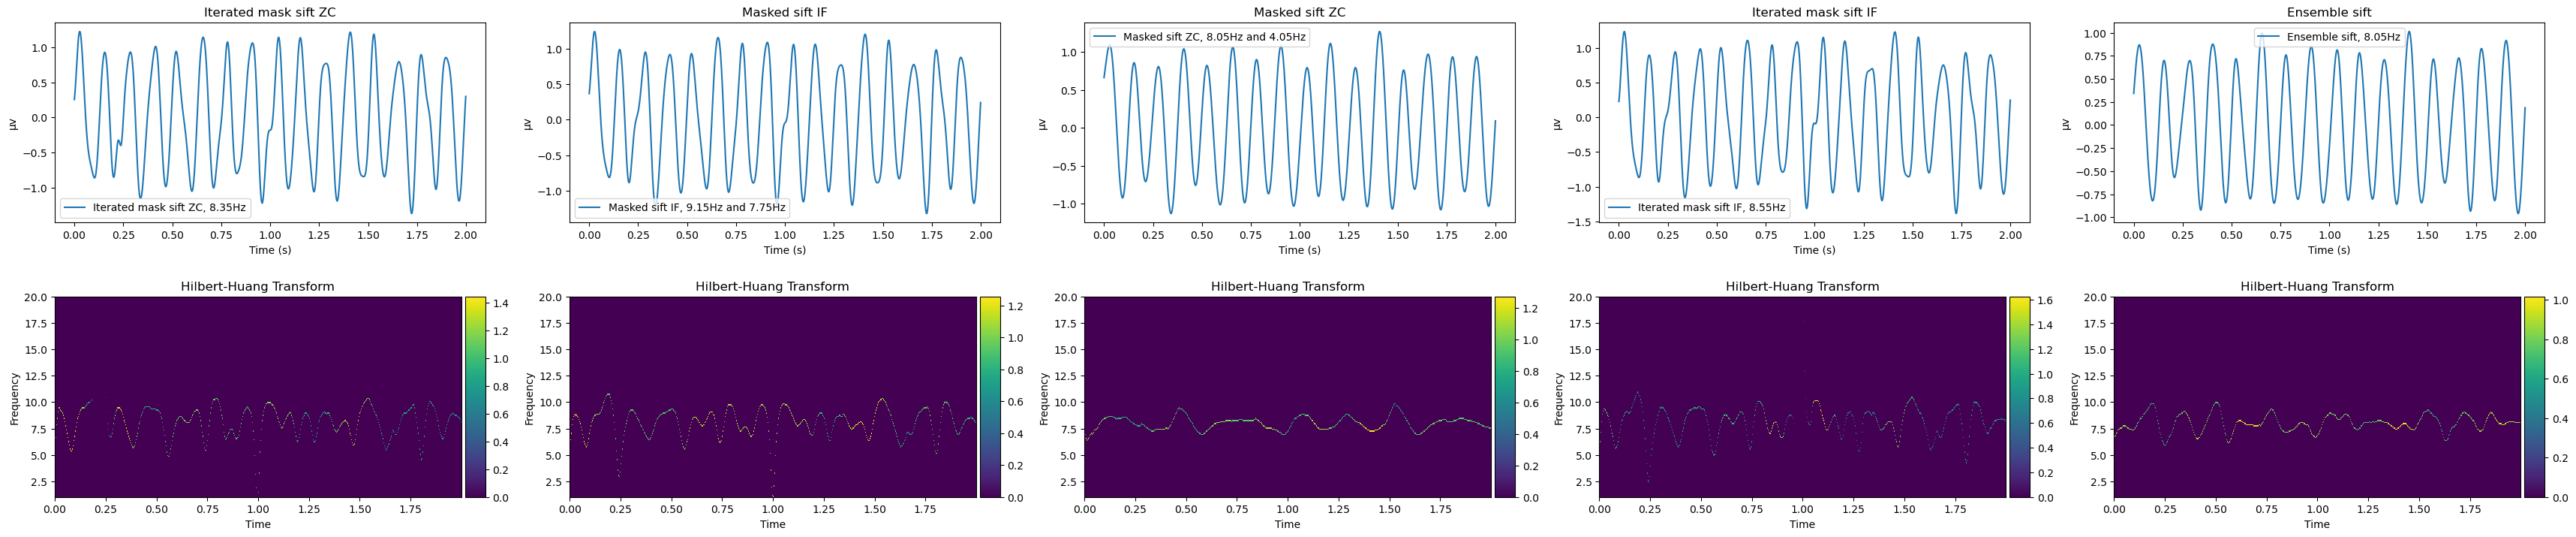

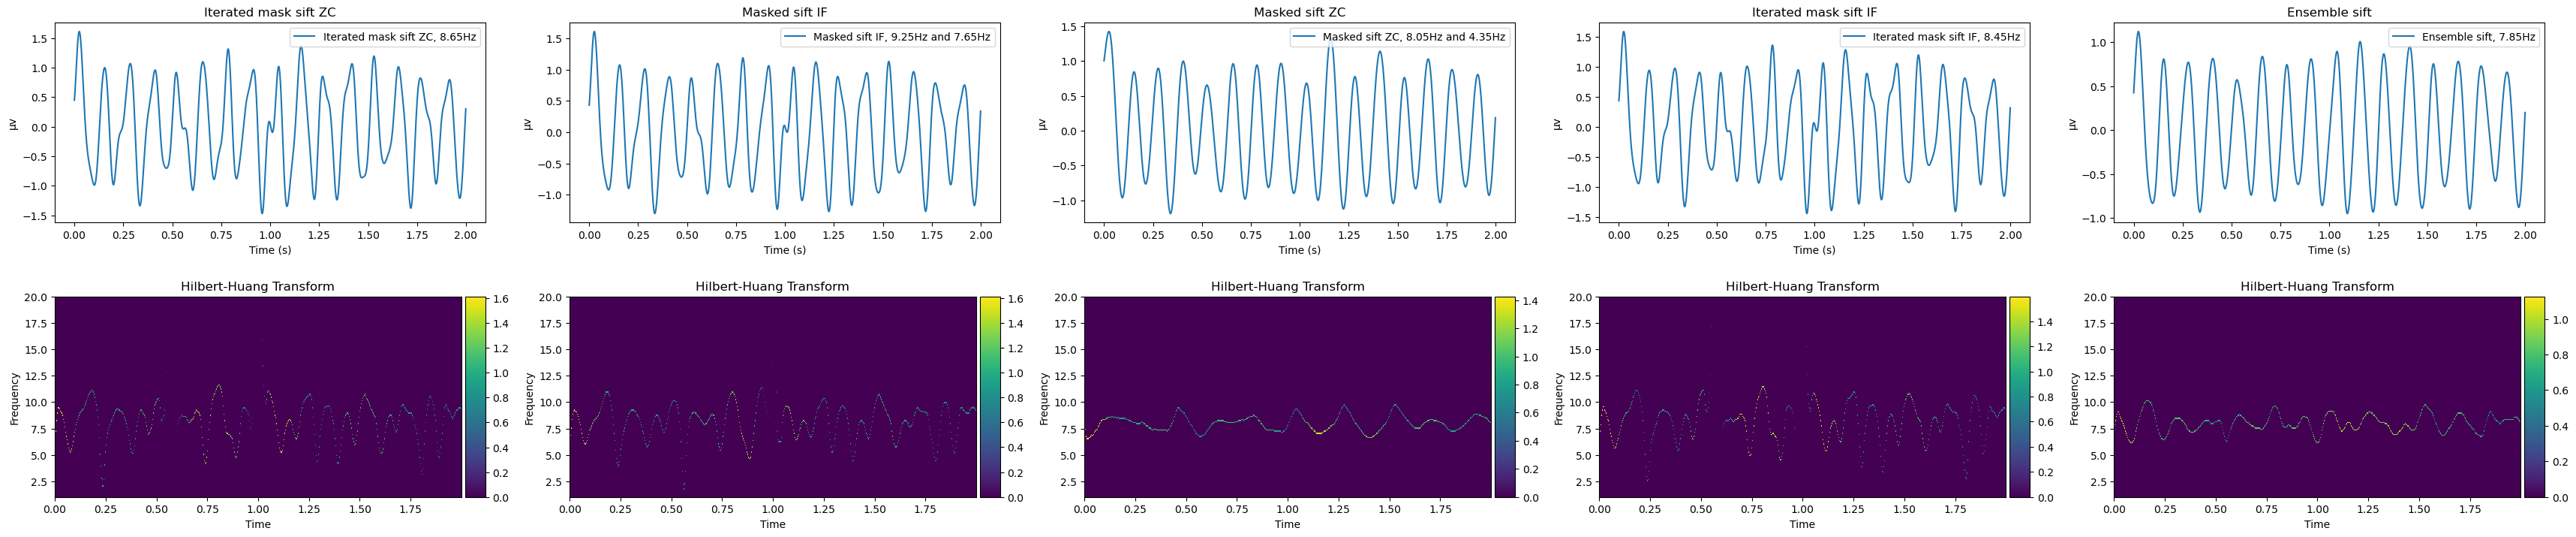

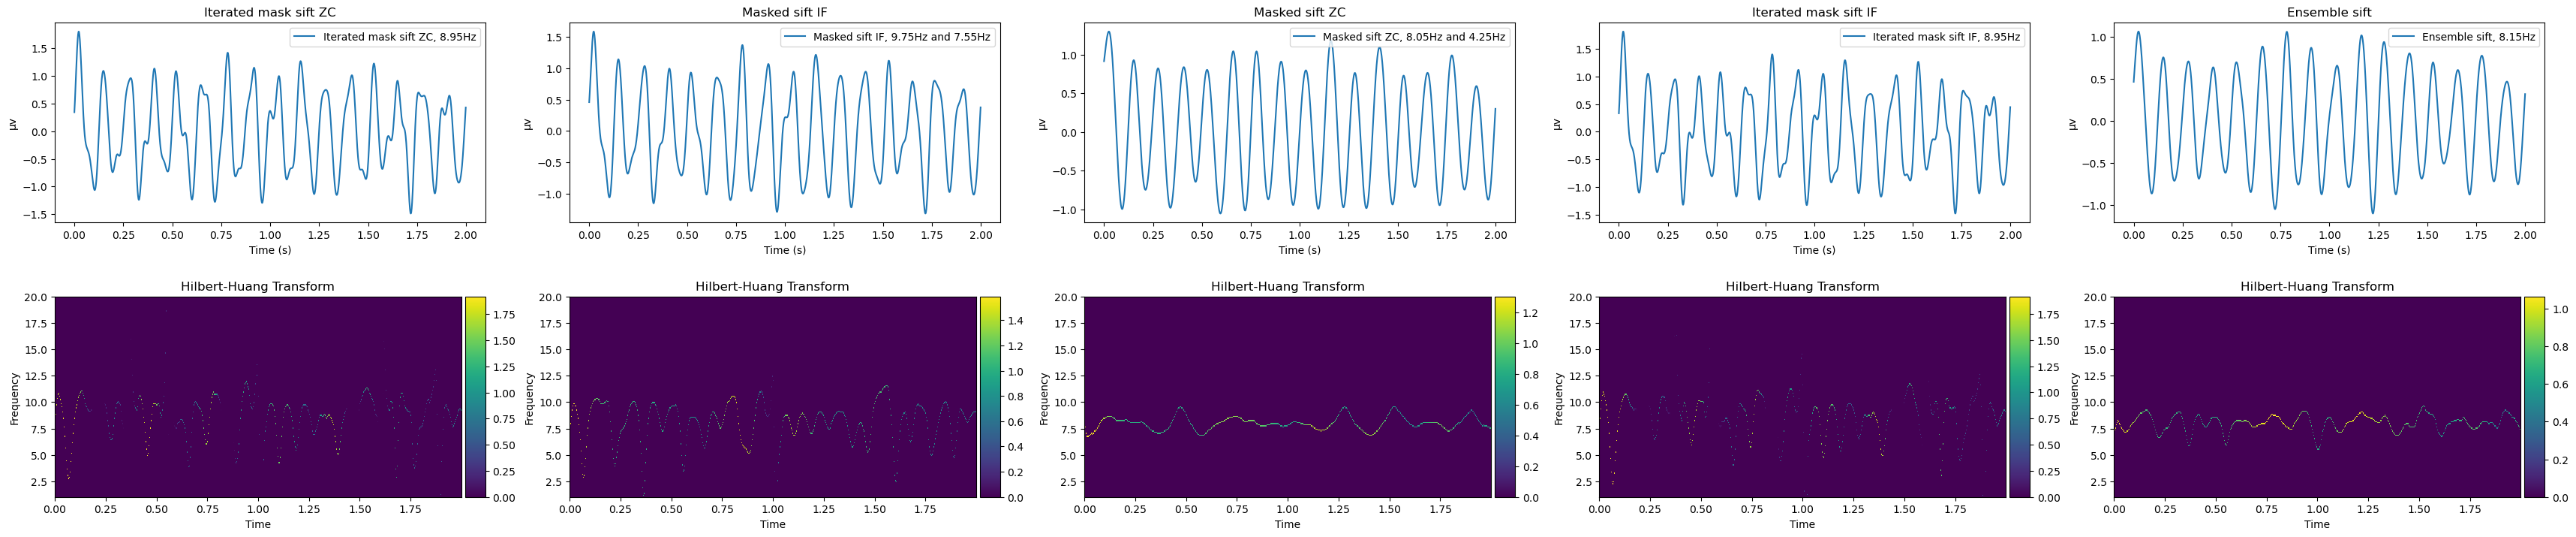

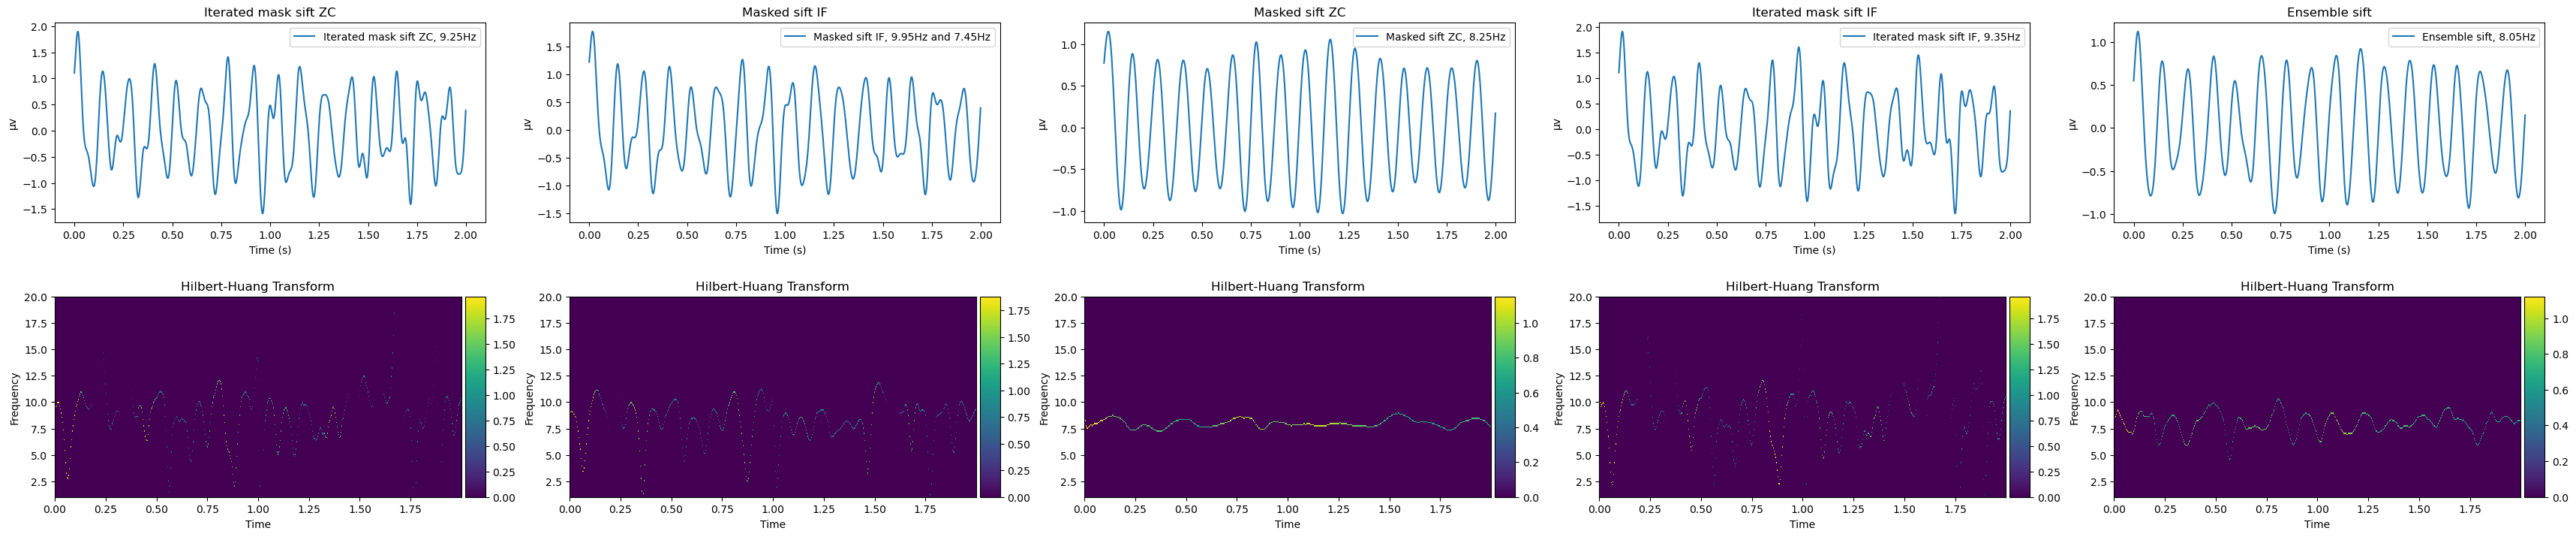

In [13]:
for selected_imfs, selected_freqs, selected_hhts in zip(selected_imfs_gen, selected_freqs_gen, hhts_trials_gen):
    plot_wf_hht(selected_imfs, selected_freqs, selected_hhts, method_names, freq_centres, srate)

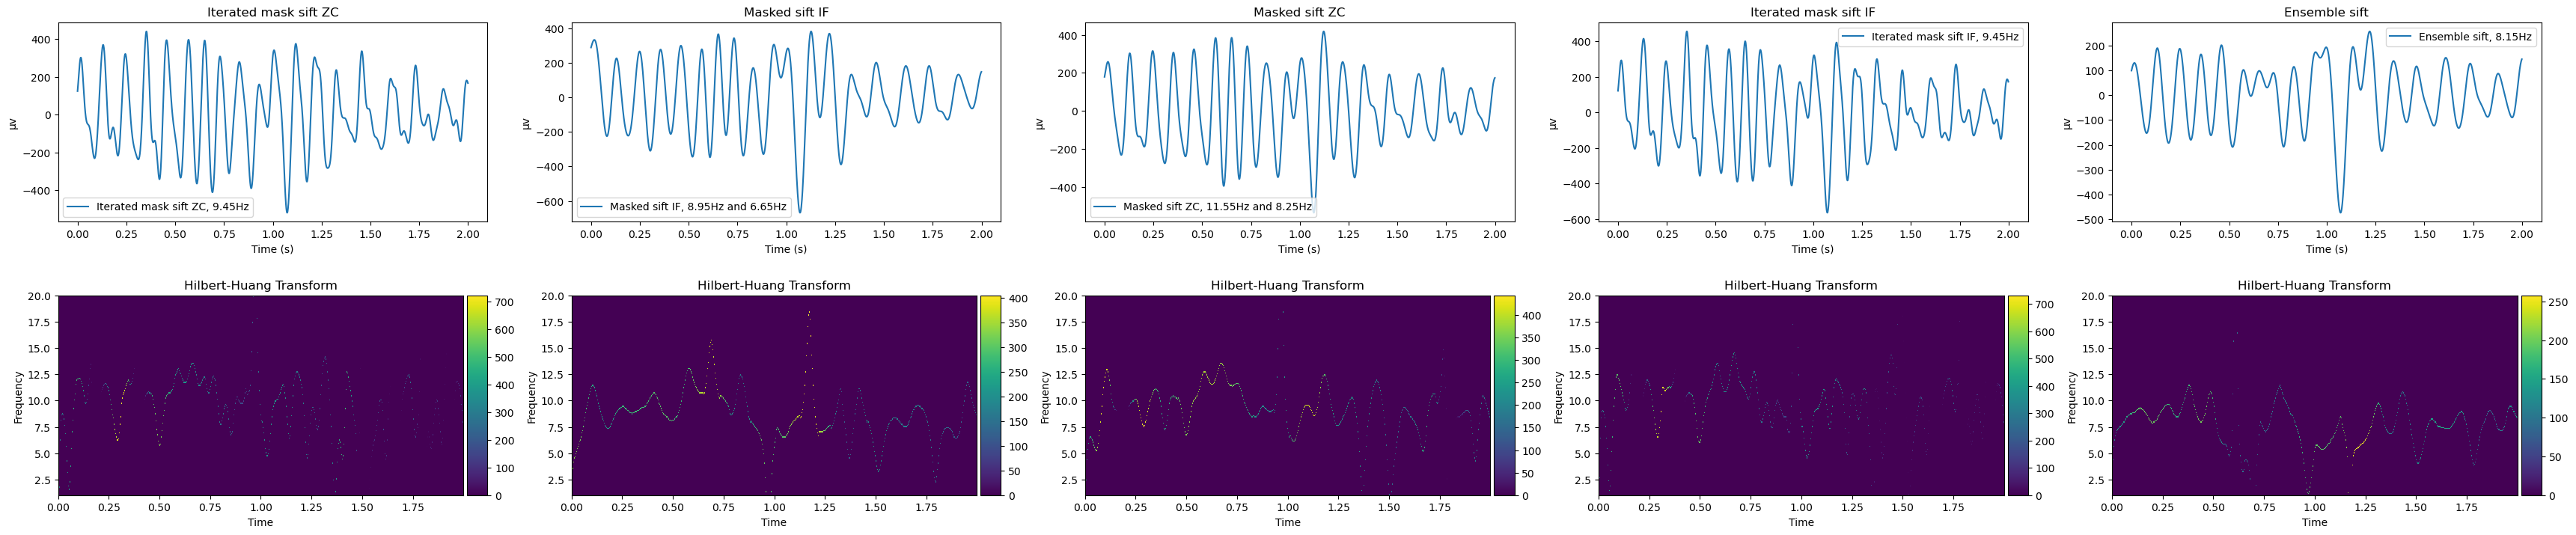

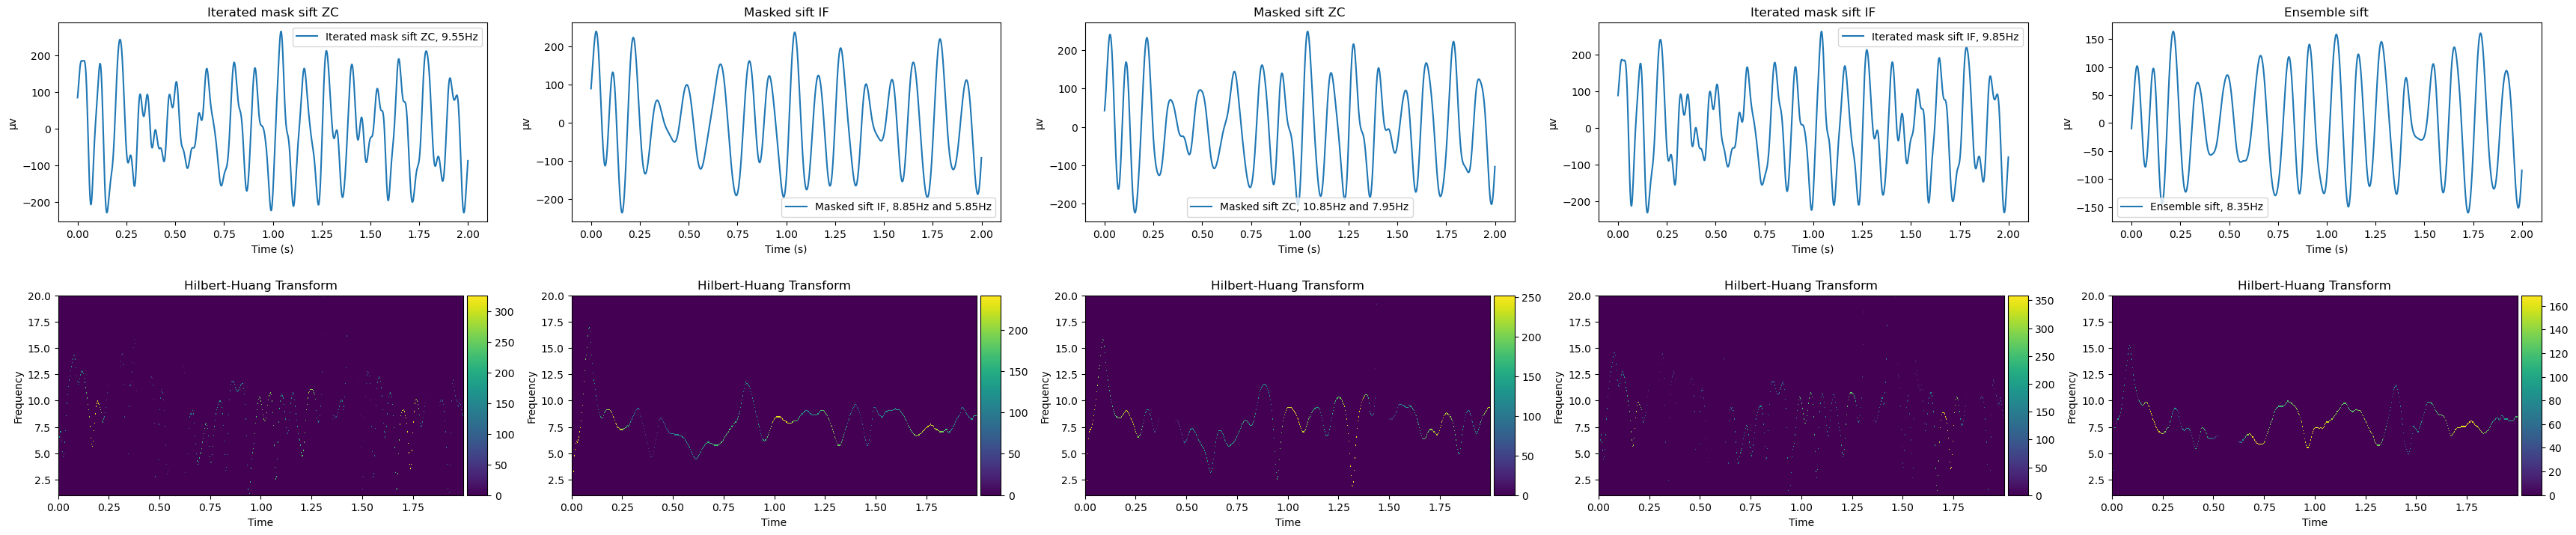

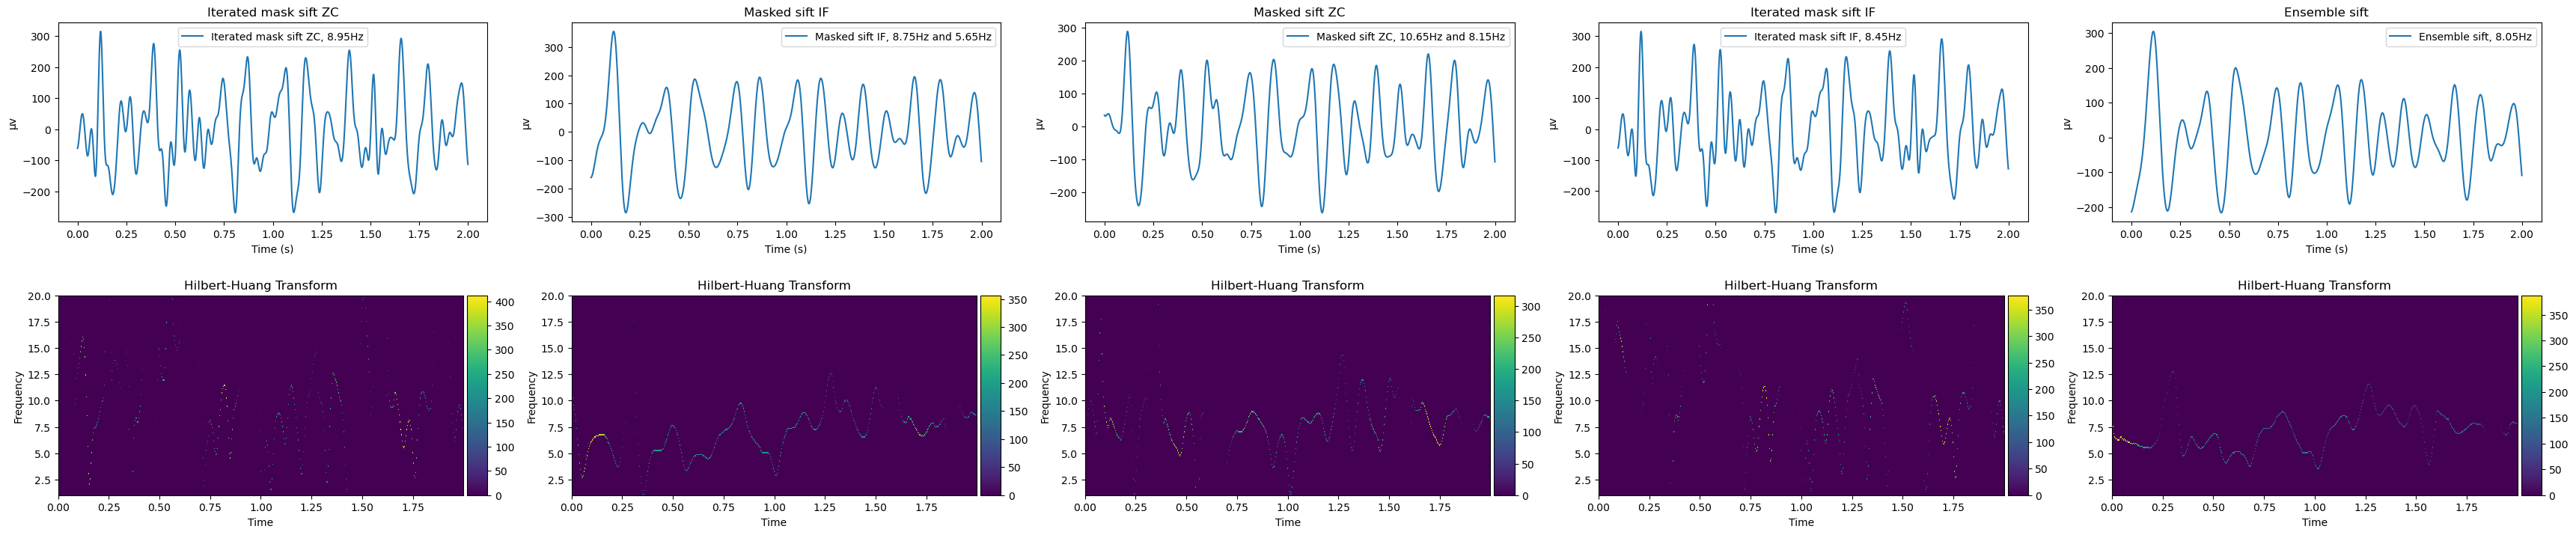

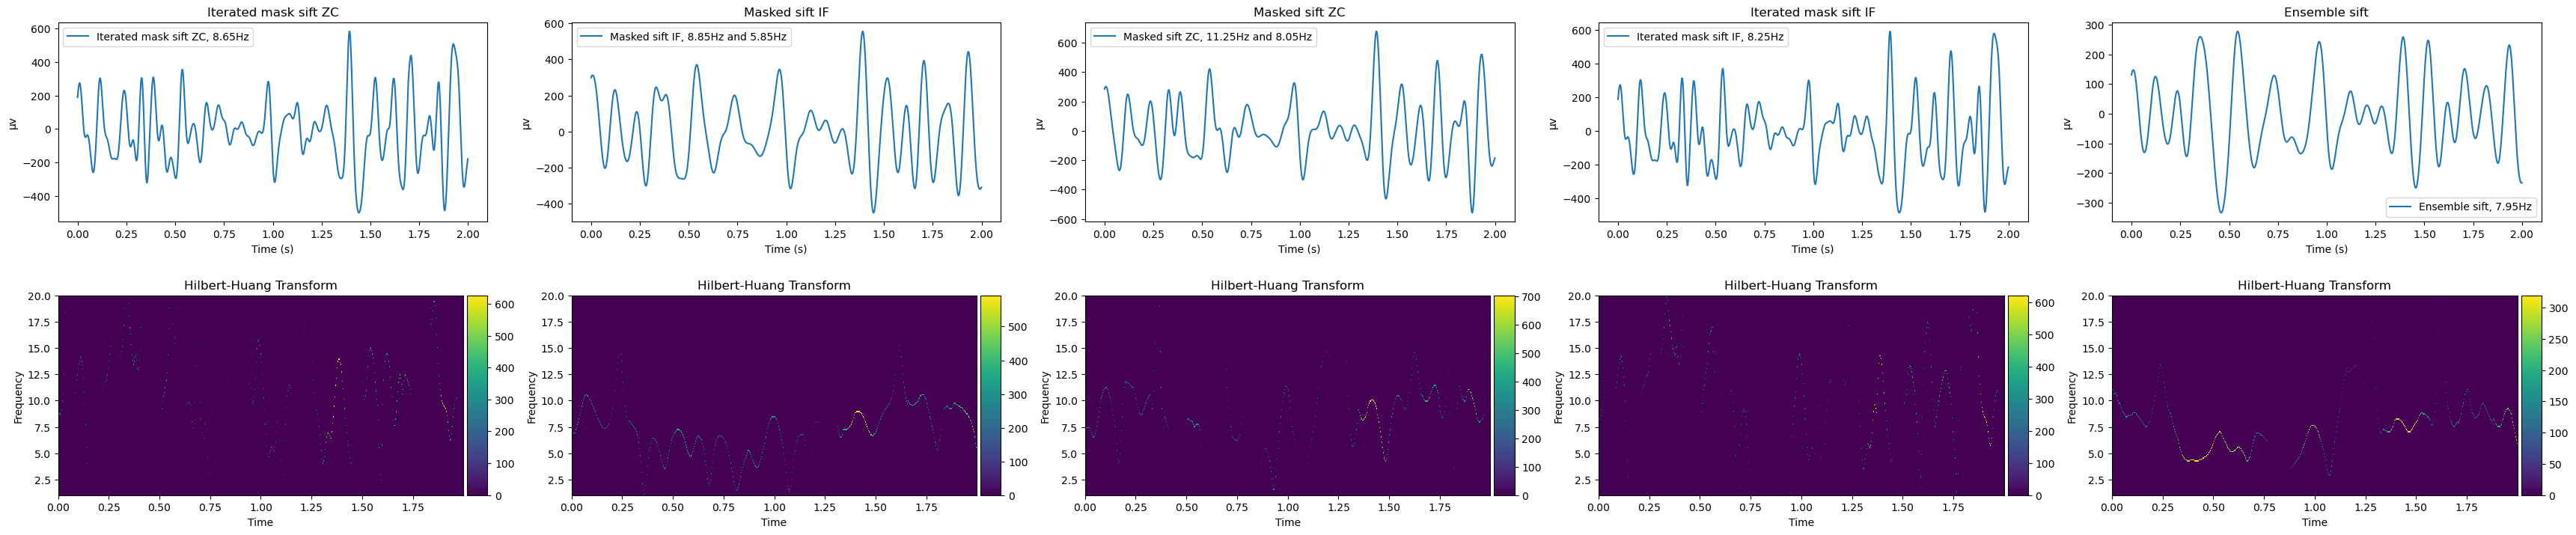

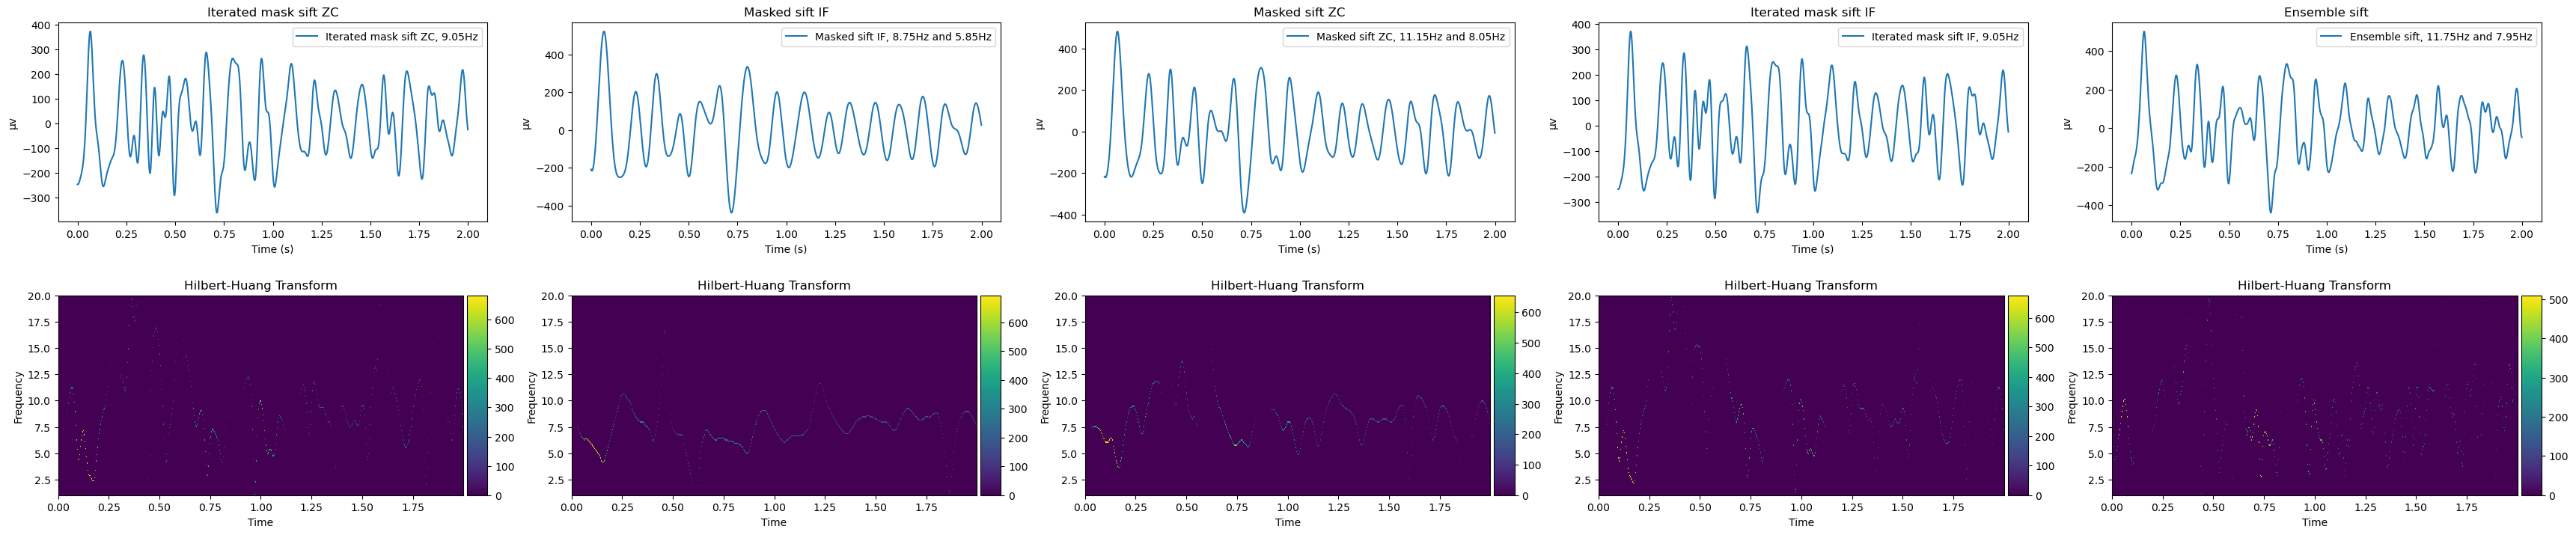

In [28]:
for trial in trials_list:
    imfs_methods_ae, selected_imfs_all, selected_freqs_all, theta_indices_all, selected_hhts, pmsis_all = single_trial_analysis(trial, srate, maskmethods_list, ensemblemethods_list, freq_edges)
    plot_wf_hht(selected_imfs_all, selected_freqs_all, selected_hhts, method_names, freq_centres, srate)

In [17]:
# PMSI's on trial data
pmsis_trials = trials_analysis(trials_list, maskmethods_list, ensemblemethods_list, method_names, srate, freq_edges, pmsi_only=True)

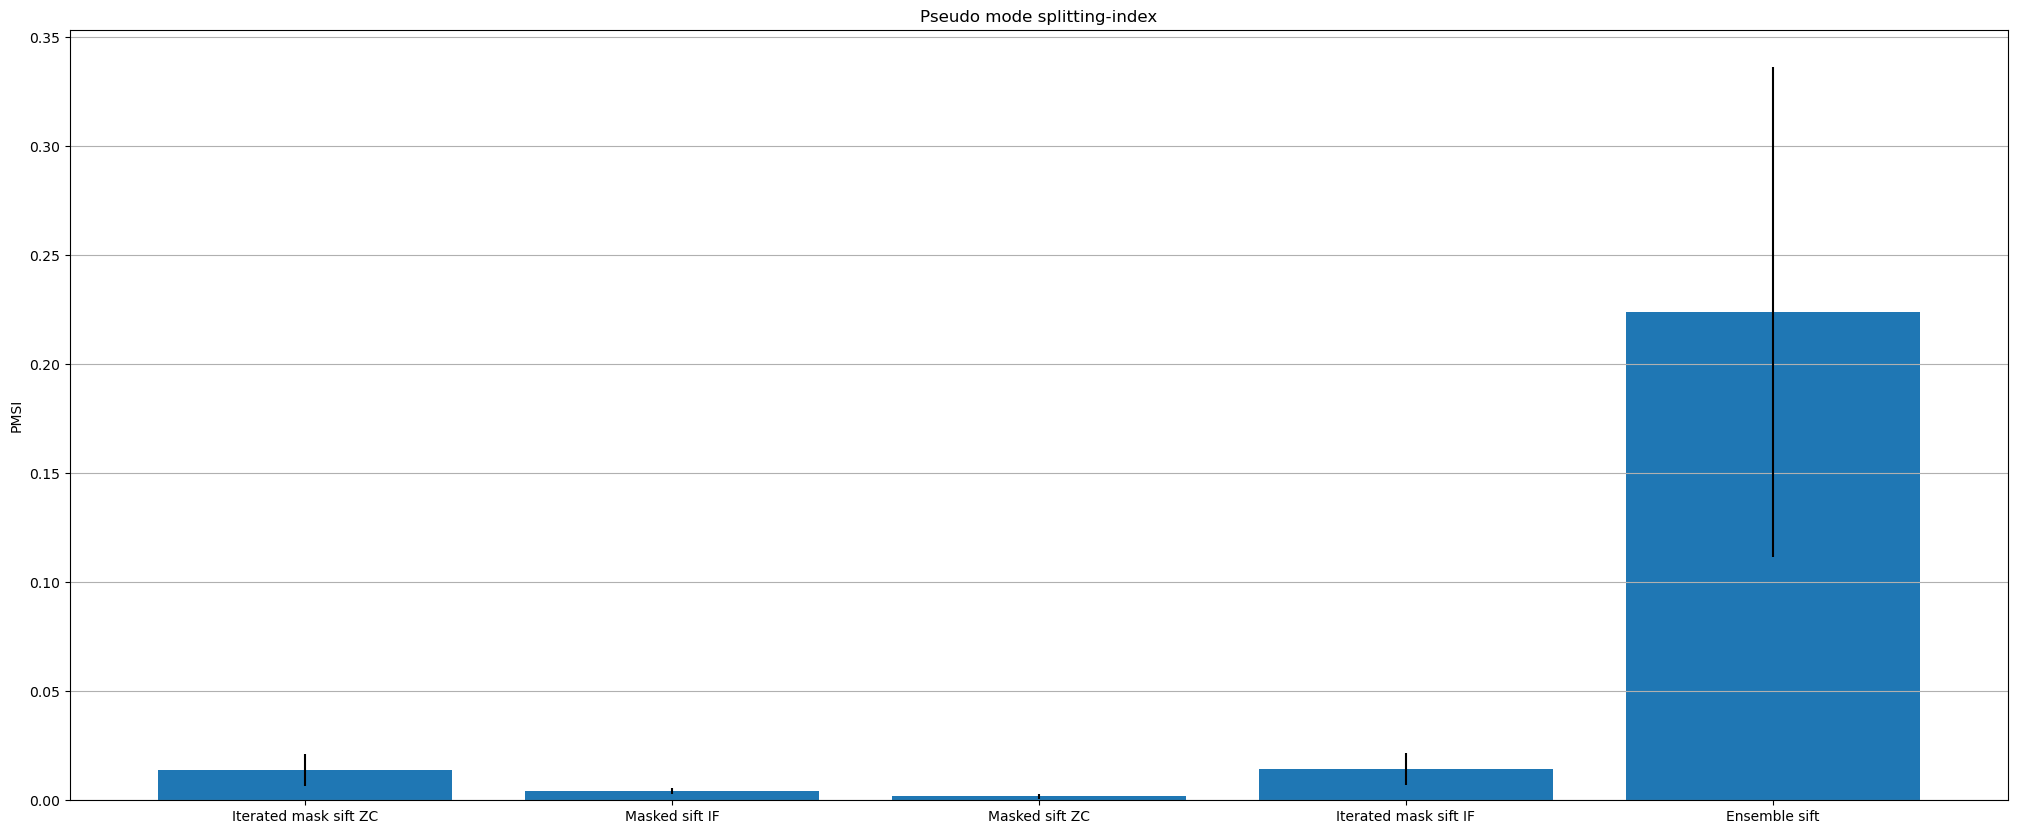

In [20]:
# PMSI on trial data
plot_pmsi(pmsis_trials, method_names)

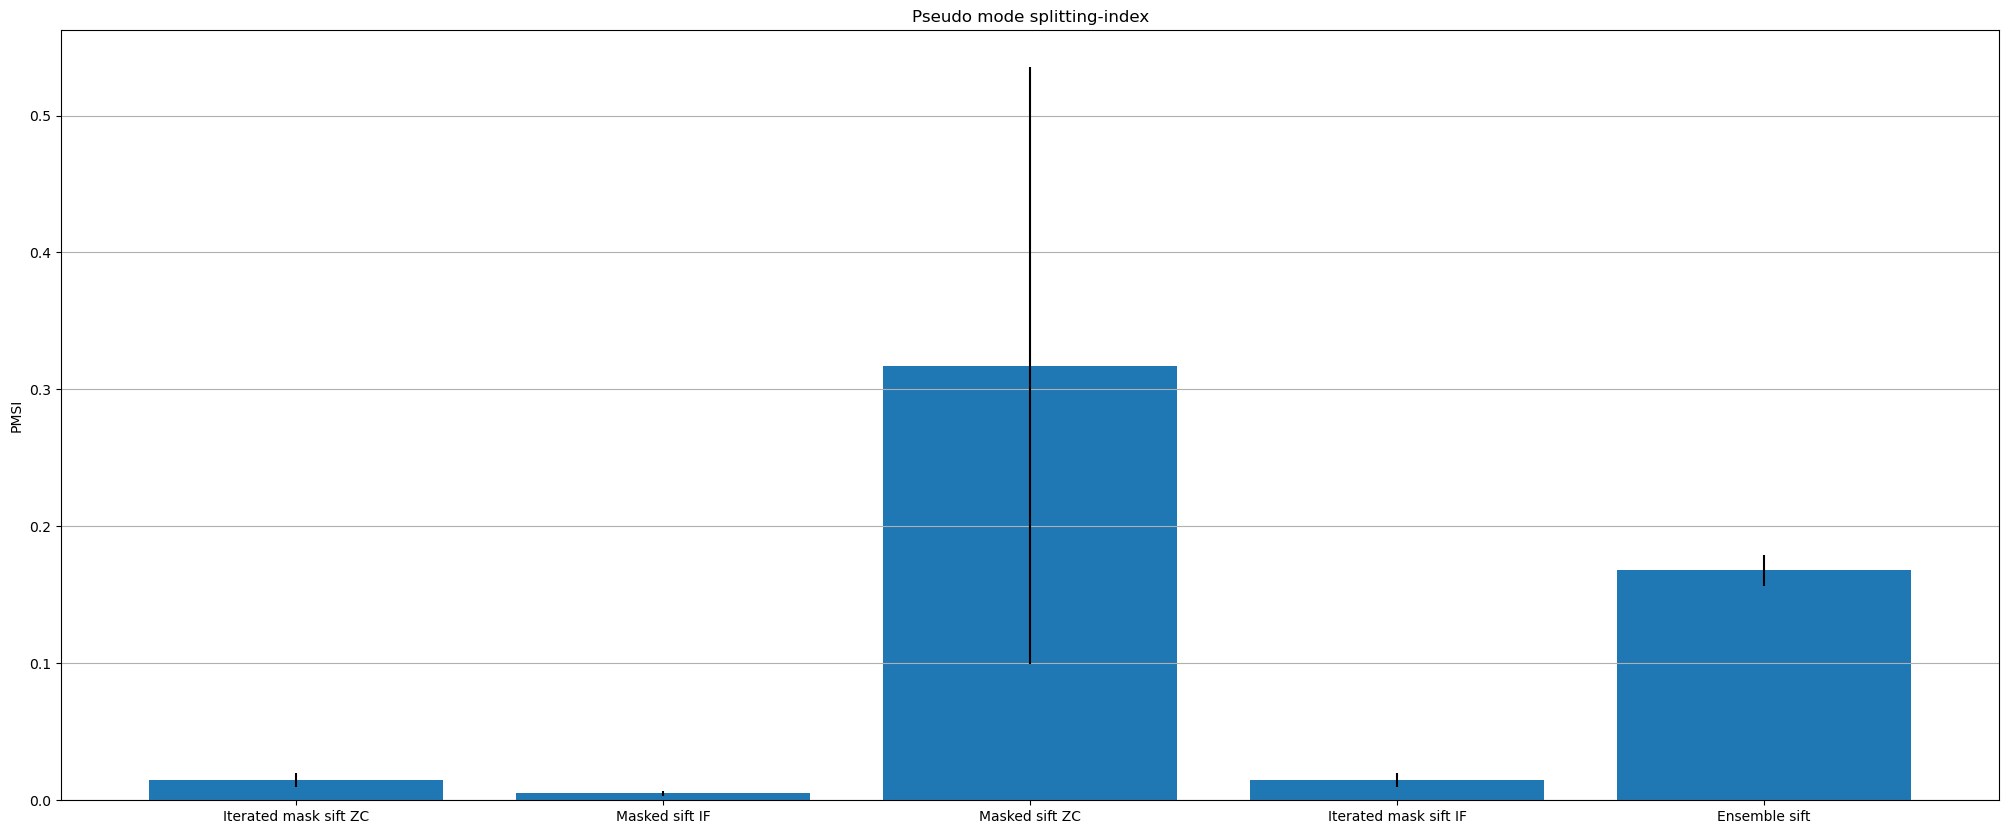

In [26]:
# PMSI on generated data
plot_pmsi(pmsis_trials_gen, method_names)

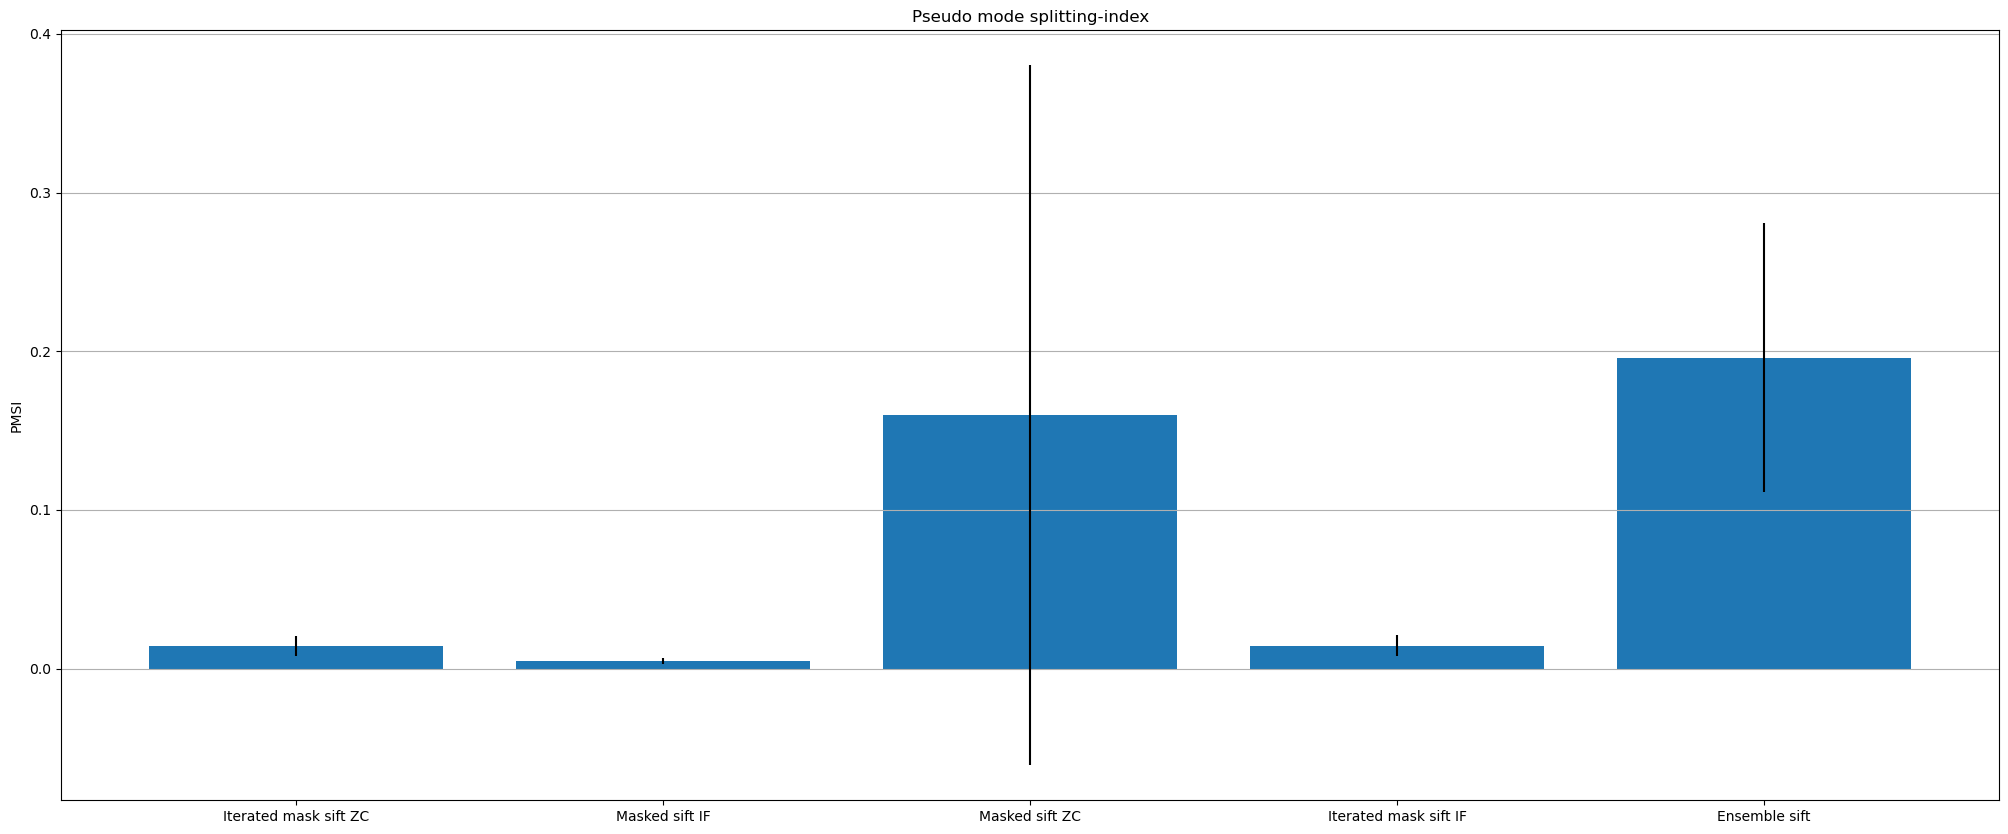

In [25]:
# PMSI on generated and trial data combined
plot_pmsi(np.vstack((pmsis_trials_gen, pmsis_trials) ), method_names)